In [1]:
import os 
import pathlib
import numpy as np 
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_dir = "/home/jvdboss/workspace/ML_DL/human-action-recognition/train_data"
test_dir = "/home/jvdboss/workspace/ML_DL/human-action-recognition/test_data"

In [3]:
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)

['calling' 'clapping' 'cycling' 'dancing' 'drinking' 'eating' 'fighting'
 'hugging' 'laughing' 'listening_to_music' 'running' 'sitting' 'sleeping'
 'texting' 'using_laptop']


In [4]:
def view_random_image(target_dir,target_class):
    target_folder=target_dir+target_class
    random_image=random.sample(os.listdir(target_folder),1)
    img=mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image Shape:{img.shape}")  

Image Shape:(200, 252, 3)


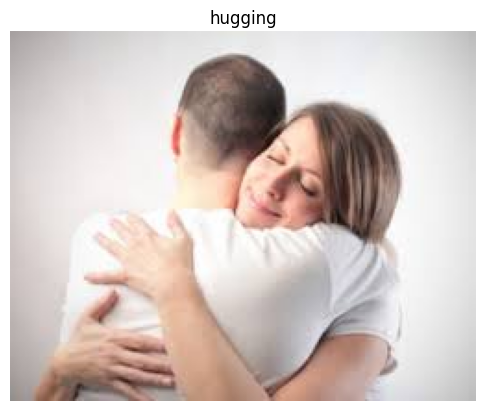

In [5]:
img=view_random_image("/home/jvdboss/workspace/ML_DL/human-action-recognition/test_data/",random.choice(class_names))

In [8]:
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)
train_data=train_datagen.flow_from_directory(train_dir,
                                            target_size=(384,384),
                                            batch_size=32,
                                            class_mode='categorical')
test_data=test_datagen.flow_from_directory(test_dir,
                                          target_size=(384,384),
                                          batch_size=32,
                                          class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [ ]:
train_data.save_format())

In [9]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
efficientnet_V2_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/2"
IMAGE_SHAPE=(224,224)

In [10]:
#creating function to use different models 
def create_model(model_url, num_classes=10):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,))
  
  model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(num_classes, activation='softmax', name='output_layer')     
  ])

  return model

In [ ]:
# Create model
efficientnet_model = create_model(model_url=efficientnet_V2_url,
                                  num_classes=15)

# Compile EfficientNet model
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model 
efficientnet_history = efficientnet_model.fit(train_data, 
                                              epochs=5,
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                             )

2023-01-25 16:25:00.846432: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 16:25:01.013401: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 16:25:01.013765: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 16:25:01.014831: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/5


2023-01-25 16:25:16.722765: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101


469/469 [==============================] - 305s 619ms/step - loss: 1.0646 - accuracy: 0.6868 - val_loss: 0.9133 - val_accuracy: 0.7217
Epoch 2/5
469/469 [==============================] - 289s 615ms/step - loss: 0.7430 - accuracy: 0.7663 - val_loss: 0.8292 - val_accuracy: 0.7387
Epoch 3/5
469/469 [==============================] - 288s 613ms/step - loss: 0.6734 - accuracy: 0.7862 - val_loss: 0.8042 - val_accuracy: 0.7457
Epoch 4/5
469/469 [==============================] - 288s 614ms/step - loss: 0.6293 - accuracy: 0.8014 - val_loss: 0.7916 - val_accuracy: 0.7487
Epoch 5/5
469/469 [==============================] - ETA: 0s - loss: 0.5937 - accuracy: 0.8101

In [ ]:
# function for loss curves
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
efficientnet_model.summary()


In [ ]:
plot_loss_curves(efficientnet_history)
